# Importando as bibliotecas

In [1]:
import os

import numpy as np
from IPython.display import display
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(393)

%matplotlib notebook

In [2]:
# setando diretorio das imagens
dir_imgs = os.path.join('E:\Biblioteca\Documentos\PROJETOS\projeto-sin393\mpeg7_4classes_aug_x8_work')
# setando diretorio das imagens de treino
train_imgs = os.path.join(dir_imgs,'Train')
# setando diretorio das imagens de teste
test_imgs = os.path.join(dir_imgs,'Test')
# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(train_imgs)        

In [3]:
image_list_train = []

# Listas com os rótulos das imagens
label_list_train = []

# Listas com os nomes das imagens
filename_list_train_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list_train = os.listdir(os.path.join(train_imgs, classe))
    
    # Percorre os arquivos na pasta atual (treino)
    for filename in sorted(filename_list_train):
        # Carrega a imagem
        img_train = plt.imread(os.path.join(train_imgs, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list_train.append(img_train)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_train.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_train_.append(filename)

In [4]:
# Lista com os rótulos das imagens        
print(label_list_train)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

In [5]:
image_list_test = []

# Listas com os rótulos das imagens
label_list_test = []

# Listas com os nomes das imagens
filename_list_test_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list_test = os.listdir(os.path.join(test_imgs, classe))
    
    # Percorre os arquivos na pasta atual (teste)
    for filename in sorted(filename_list_test):
        # Carrega a imagem
        img_test = plt.imread(os.path.join(test_imgs, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list_test.append(img_test)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_test.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_test_.append(filename)

In [6]:
# Lista com os rótulos das imagens        
print(label_list_test)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beet

# Convertendo os nomes das classes para índices numéricos

In [7]:
_, _, label_list_train_idx = np.unique(label_list_train, return_index=True, return_inverse=True)
_, _, label_list_test_idx = np.unique(label_list_test, return_index=True, return_inverse=True)

print(label_list_train_idx)
print('-------------------------------------------------------------------------------')
print(label_list_test_idx)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

# Plotando as imagens do conjunto de dados

In [8]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list_train[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]


<IPython.core.display.Javascript object>


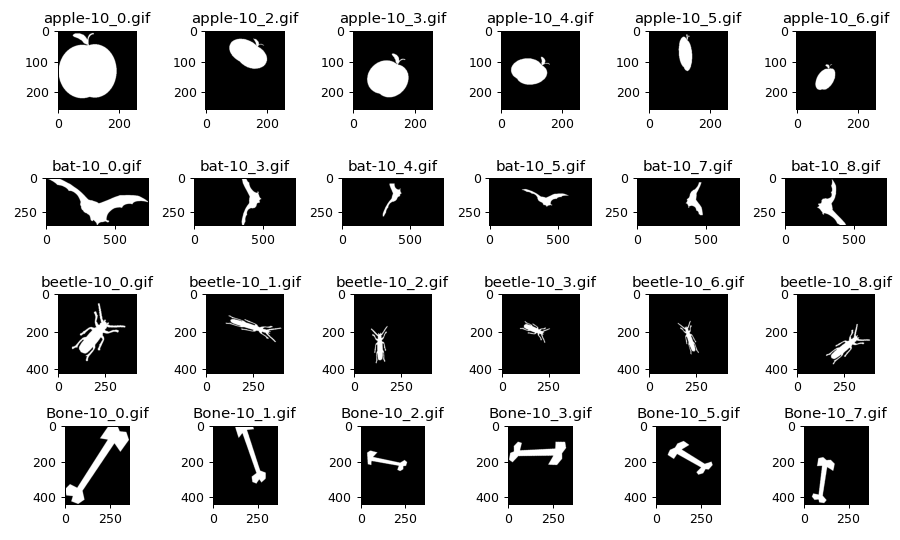

In [9]:
fig, ax = plt.subplots(4, 6, figsize=(10, 6))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap=plt.cm.gray)
    ax[i//6, i%6].set_title(str(filename))
    
fig.tight_layout()
plt.show()

# Extraindo caracteristicas das imagens

In [10]:
# Nomes das caracteristicas computadas
features = ['solidity', 'eccentricity', 'perimeter', 'extent', 'feret_diameter_max']

In [11]:
# Concatenando os arrays
label_list = [*label_list_train, *label_list_test]
image_list = [*image_list_train, *image_list_test]
label_list_idx = [*label_list_train_idx, *label_list_test_idx]
filename_list = [*filename_list_train_, *filename_list_test_]

# Arranjo 2D com as caracteristicas das imagens
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Segmenta a imagem
    # --------------------------------------------------
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Converte imagem para níveis de cinza
    if img_float.shape[-1] == 4:
        img_float = color.rgb2gray(color.rgba2rgb(img_float))
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float > filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 100)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)

    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue
    
    for prop in props:
        solidity = prop.solidity
        eccentricity = prop.eccentricity
        perimeter = prop.perimeter
        extent = prop.extent
        feret_diameter_max = prop.feret_diameter_max

        # vetor de caracteristicas.
        feature_list = [solidity, eccentricity, perimeter, extent, feret_diameter_max]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

In [12]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[   0.9042    0.2478  819.2519    0.7068  222.1711]
 [   0.9162    0.777   452.3808    0.7045  132.6084]
 [   0.8991    0.3734  571.0265    0.6674  148.054 ]
 ...
 [   0.4535    0.9788 1430.3911    0.1881  495.2898]
 [   0.4507    0.9855 1500.3688    0.178   495.2898]
 [   0.4507    0.9855 1500.3688    0.178   495.2898]]


In [13]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[  0.3297   0.1595 217.8234   0.089   64.56  ]
[   0.9696    0.9985 4551.641     0.7971  768.7503]
[   0.6227    0.8001 1190.0524    0.386   313.2717]
[  0.197    0.21   690.2683   0.1894 167.262 ]


In [14]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]

<IPython.core.display.Javascript object>


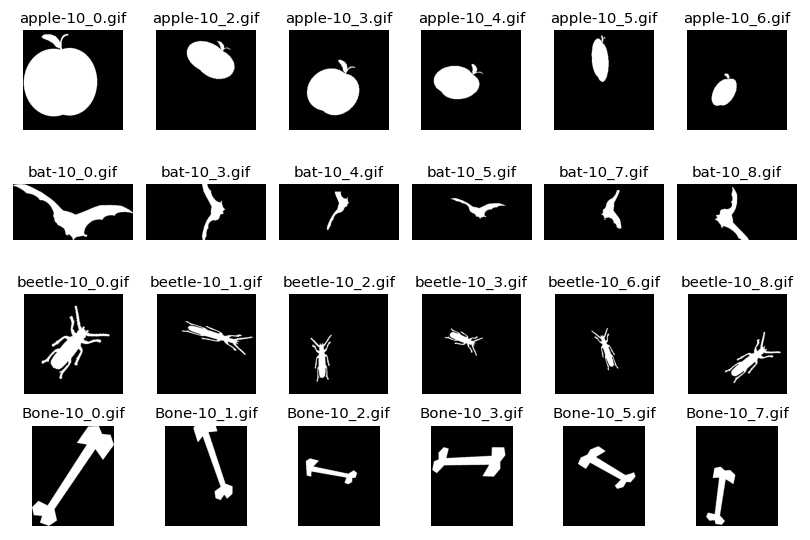

In [15]:
fig, ax  = plt.subplots(4, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

In [16]:
df = pd.DataFrame(feature_map, columns=features)
df['class'] = label_list
display(df)

,solidity,eccentricity,perimeter,extent,feret_diameter_max,class
0,0.904154,0.247787,819.251875,0.706766,222.171105,apple
1,0.916241,0.776975,452.380772,0.704500,132.608446,apple
2,0.899108,0.373363,571.026479,0.667385,148.054044,apple
3,0.898984,0.675792,436.410209,0.686684,127.906216,apple
4,0.918016,0.925710,321.415260,0.703591,119.104996,apple
...,...,...,...,...,...,...
715,0.478761,0.981412,1415.746391,0.191727,495.289814,bone
716,0.453541,0.978811,1430.391052,0.188115,495.289814,bone
717,0.453541,0.978811,1430.391052,0.188115,495.289814,bone
718,0.450704,0.985526,1500.368758,0.177989,495.289814,bone


<IPython.core.display.Javascript object>


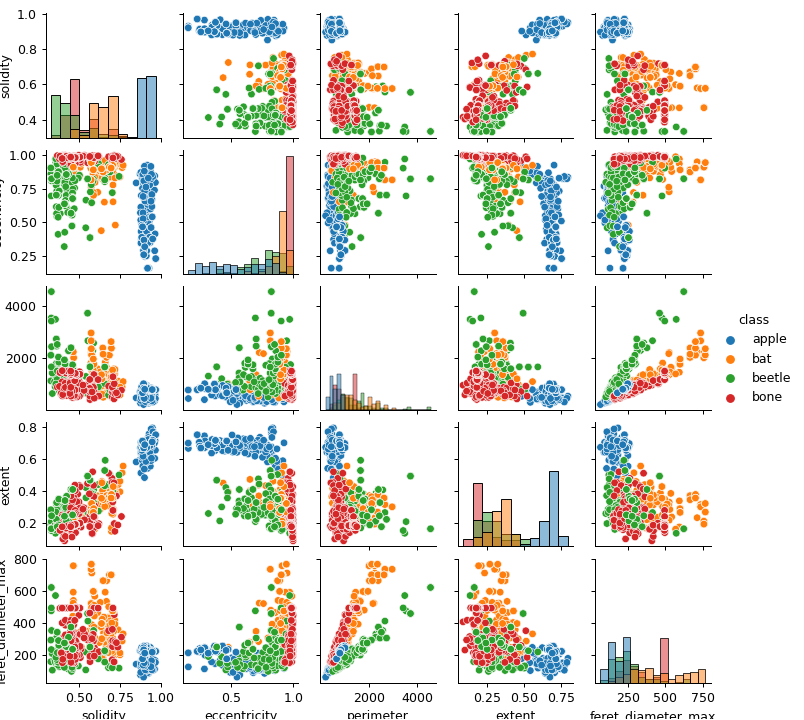

In [17]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Separando os conjuntos de dados

In [18]:
# Escolhendo as caracteristicas
feature_map_ok = feature_map[:,:]

# Treino
X_test_1 = feature_map_ok[len(image_list_train):,:]
#Teste
X_train_1 = feature_map_ok[0:len(image_list_train),:]

# Treino
y_train_1 = label_list_train_idx
#Teste
y_test_1 = label_list_test_idx

# 30% do conjunto de Treino para validação.
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.3, 
                                                                      random_state=393,
                                                                      stratify=y_train_1)

In [19]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[  0.6263   0.8263 971.5199   0.3864 260.8961]
[  0.1975   0.1784 567.8358   0.186  136.0757]


# Normalizando

In [20]:
# Transformada Normal de Caracteristicas (Manual)
# ----
X_train_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
X_test_norm = (X_test_1 - X_train_2_mean) / X_train_2_std

with np.printoptions(precision=4, suppress=True):
    print(f'Média do conjunto de treino:  \t {np.array(X_train_2.mean(0))}')
    print(f'Média do conjunto de treino normalizado:  \t {np.array(X_train_norm.mean(0))}')   
    print('\n')
    print(f'Desv. pad. do conjunto de treino: \t {np.array(X_train_2.std(0))}')
    print(f'Desv. pad. do conjunto de treino normalizado: \t {np.array(X_train_norm.std(0))}')

Média do conjunto de treino:  	 [  0.6263   0.8263 971.5199   0.3864 260.8961]
Média do conjunto de treino normalizado:  	 [0. 0. 0. 0. 0.]


Desv. pad. do conjunto de treino: 	 [  0.1975   0.1784 567.8358   0.186  136.0757]
Desv. pad. do conjunto de treino normalizado: 	 [1. 1. 1. 1. 1.]


In [21]:
with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 0.0000 ± 1.0000
Validação: 	 0.0355 ± 0.9643
Teste:   	 0.3764 ± 1.4338


# Otimizando hiperparametros com o conjunto de validação

In [22]:
k_list = [3, 5, 7, 9, 11, 13]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<IPython.core.display.Javascript object>


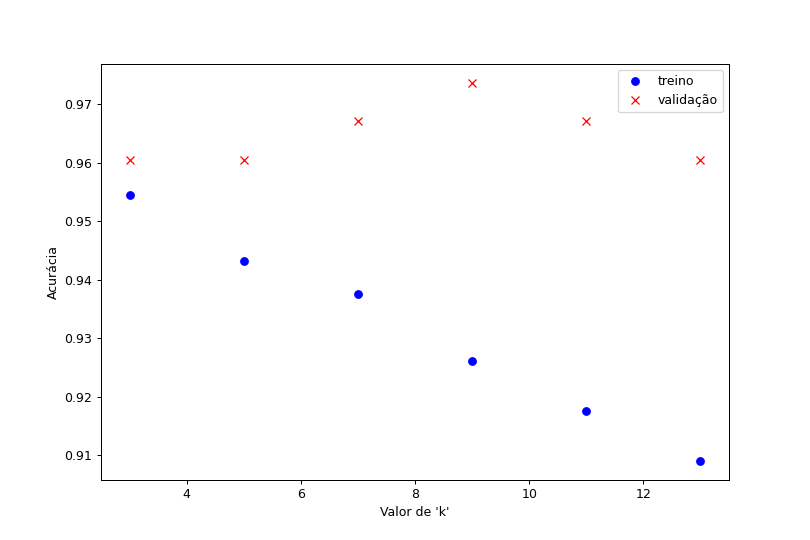

In [23]:
# Lista com as acurácias de treino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  
    
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [24]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
3 	 0.9545 	 0.9605
5 	 0.9432 	 0.9605
7 	 0.9375 	 0.9671
9 	 0.9261 	 0.9737
11 	 0.9176 	 0.9671
13 	 0.9091 	 0.9605

Melhor 'k': 9 (0.9737 acc.)


# Matriz de confusão e Relatório de classificação do conjunto de TESTES

In [25]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test_1, pred)

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test_1, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test_1, pred))

print(f'Acurácia obtida: {round((acc_val*100), 2)}%')


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  4  0 50]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      1.00      0.96        54
           2       1.00      1.00      1.00        54
           3       1.00      0.93      0.96        54

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216

Acurácia obtida: 98.15%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Matriz de confusão e Relatório de classificação do conjunto de VALIDAÇÃO

In [26]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train_2)

# Testando o classificador (usando o conjunto de VALIDAÇÃO)
pred = clf.predict(X_val_norm)
acc_val = metrics.accuracy_score(y_val, pred)

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_val, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_val, pred))

print(f'Acurácia obtida: {round((acc_val*100), 2)}%')


Matriz de confusão:
[[38  0  0  0]
 [ 0 38  0  0]
 [ 0  0 38  0]
 [ 0  4  0 34]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.90      1.00      0.95        38
           2       1.00      1.00      1.00        38
           3       1.00      0.89      0.94        38

    accuracy                           0.97       152
   macro avg       0.98      0.97      0.97       152
weighted avg       0.98      0.97      0.97       152

Acurácia obtida: 97.37%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
